In [1]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Precipitation (rainfall and assumed water equivalent), in millimeters
pr_historical = pd.read_csv('historical_yearly_precipitation.csv')
pr_historical

,Unnamed: 0,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,Venezuela,Vietnam,Wake Island (U.S.),Wallis and Futuna (Fr.),West Bank and Gaza,"Yemen, Republic of",Zambia,Zimbabwe,romania,serbia and montenegro
0,1901,19.954466,94.731670,9.086229,215.86667,65.837500,78.029625,200.60834,364.68750,38.854744,...,156.648450,147.06902,NaN,246.35832,26.168182,13.775259,83.015884,66.519730,54.282800,NaN
1,1902,18.801144,91.627670,8.284088,189.99167,74.064580,78.282394,160.43333,300.17084,40.401207,...,155.516330,159.50072,NaN,243.28750,39.097725,13.614161,86.236290,51.544983,48.508987,NaN
2,1903,23.728622,79.166000,6.730287,255.64168,55.468750,80.566010,141.35000,250.56250,42.776570,...,159.411580,147.91920,NaN,252.41667,28.510605,13.601555,74.615135,43.663100,42.776012,NaN
3,1904,23.429220,77.868670,8.947877,267.93332,48.277084,73.865105,130.29166,192.07500,44.372555,...,159.998000,165.86374,NaN,253.12918,48.288635,13.441969,83.080700,55.066765,39.530773,NaN
4,1905,21.574781,67.165665,8.052203,156.85834,73.325000,73.360430,174.64166,344.16250,45.000557,...,158.464020,154.54550,NaN,239.68750,45.146970,13.776987,74.225190,41.731678,44.678930,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2008,19.671432,73.312000,8.657320,244.19168,72.039580,82.951546,129.28334,183.71250,41.913933,...,175.494670,172.22360,NaN,232.57500,23.775757,13.609241,83.759995,54.911500,49.906906,NaN
108,2009,29.109913,105.571000,8.264082,256.13333,62.081250,84.405910,135.50000,169.30833,43.880096,...,124.315025,144.67026,NaN,226.22083,26.821970,13.478108,83.955590,50.175500,48.722023,NaN
109,2010,26.058004,109.116320,8.614675,NaN,NaN,84.175186,NaN,NaN,48.375860,...,207.129670,142.03558,72.33333,196.81667,24.694445,12.647741,93.453860,60.400684,67.033330,NaN
110,2011,28.744762,57.047570,9.133665,NaN,NaN,84.190260,NaN,NaN,46.950428,...,184.172550,172.38461,72.33333,249.31668,30.060184,14.057001,81.021900,57.331066,38.604324,NaN


In [3]:
# rename the year column
pr_historical = pr_historical.rename(columns={'Unnamed: 0': 'year'}) 
pr_historical

,year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,Venezuela,Vietnam,Wake Island (U.S.),Wallis and Futuna (Fr.),West Bank and Gaza,"Yemen, Republic of",Zambia,Zimbabwe,romania,serbia and montenegro
0,1901,19.954466,94.731670,9.086229,215.86667,65.837500,78.029625,200.60834,364.68750,38.854744,...,156.648450,147.06902,NaN,246.35832,26.168182,13.775259,83.015884,66.519730,54.282800,NaN
1,1902,18.801144,91.627670,8.284088,189.99167,74.064580,78.282394,160.43333,300.17084,40.401207,...,155.516330,159.50072,NaN,243.28750,39.097725,13.614161,86.236290,51.544983,48.508987,NaN
2,1903,23.728622,79.166000,6.730287,255.64168,55.468750,80.566010,141.35000,250.56250,42.776570,...,159.411580,147.91920,NaN,252.41667,28.510605,13.601555,74.615135,43.663100,42.776012,NaN
3,1904,23.429220,77.868670,8.947877,267.93332,48.277084,73.865105,130.29166,192.07500,44.372555,...,159.998000,165.86374,NaN,253.12918,48.288635,13.441969,83.080700,55.066765,39.530773,NaN
4,1905,21.574781,67.165665,8.052203,156.85834,73.325000,73.360430,174.64166,344.16250,45.000557,...,158.464020,154.54550,NaN,239.68750,45.146970,13.776987,74.225190,41.731678,44.678930,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2008,19.671432,73.312000,8.657320,244.19168,72.039580,82.951546,129.28334,183.71250,41.913933,...,175.494670,172.22360,NaN,232.57500,23.775757,13.609241,83.759995,54.911500,49.906906,NaN
108,2009,29.109913,105.571000,8.264082,256.13333,62.081250,84.405910,135.50000,169.30833,43.880096,...,124.315025,144.67026,NaN,226.22083,26.821970,13.478108,83.955590,50.175500,48.722023,NaN
109,2010,26.058004,109.116320,8.614675,NaN,NaN,84.175186,NaN,NaN,48.375860,...,207.129670,142.03558,72.33333,196.81667,24.694445,12.647741,93.453860,60.400684,67.033330,NaN
110,2011,28.744762,57.047570,9.133665,NaN,NaN,84.190260,NaN,NaN,46.950428,...,184.172550,172.38461,72.33333,249.31668,30.060184,14.057001,81.021900,57.331066,38.604324,NaN


In [4]:
# make the year column as index
pr = pr_historical.set_index('year')
pr

,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Venezuela,Vietnam,Wake Island (U.S.),Wallis and Futuna (Fr.),West Bank and Gaza,"Yemen, Republic of",Zambia,Zimbabwe,romania,serbia and montenegro
year,,,,,,,,,,,,,,,,,,,,,
1901,19.954466,94.731670,9.086229,215.86667,65.837500,78.029625,200.60834,364.68750,38.854744,44.442593,...,156.648450,147.06902,NaN,246.35832,26.168182,13.775259,83.015884,66.519730,54.282800,NaN
1902,18.801144,91.627670,8.284088,189.99167,74.064580,78.282394,160.43333,300.17084,40.401207,41.708640,...,155.516330,159.50072,NaN,243.28750,39.097725,13.614161,86.236290,51.544983,48.508987,NaN
1903,23.728622,79.166000,6.730287,255.64168,55.468750,80.566010,141.35000,250.56250,42.776570,39.445370,...,159.411580,147.91920,NaN,252.41667,28.510605,13.601555,74.615135,43.663100,42.776012,NaN
1904,23.429220,77.868670,8.947877,267.93332,48.277084,73.865105,130.29166,192.07500,44.372555,47.054320,...,159.998000,165.86374,NaN,253.12918,48.288635,13.441969,83.080700,55.066765,39.530773,NaN
1905,21.574781,67.165665,8.052203,156.85834,73.325000,73.360430,174.64166,344.16250,45.000557,38.330246,...,158.464020,154.54550,NaN,239.68750,45.146970,13.776987,74.225190,41.731678,44.678930,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,19.671432,73.312000,8.657320,244.19168,72.039580,82.951546,129.28334,183.71250,41.913933,36.009260,...,175.494670,172.22360,NaN,232.57500,23.775757,13.609241,83.759995,54.911500,49.906906,NaN
2009,29.109913,105.571000,8.264082,256.13333,62.081250,84.405910,135.50000,169.30833,43.880096,44.933952,...,124.315025,144.67026,NaN,226.22083,26.821970,13.478108,83.955590,50.175500,48.722023,NaN
2010,26.058004,109.116320,8.614675,NaN,NaN,84.175186,NaN,NaN,48.375860,58.004170,...,207.129670,142.03558,72.33333,196.81667,24.694445,12.647741,93.453860,60.400684,67.033330,NaN


In [5]:
# make sure there is not much missing data
for col in pr.columns:
    if pr[col].isna().sum() > 5:
        print(col)
        print(f' {pr[col].isna().sum()/pr.shape[0]*100}% of data is missed.')

Wake Island (U.S.)
 97.32142857142857% of data is missed.
serbia and montenegro
 100.0% of data is missed.


In [6]:
# delete the countries/columns with high percentage of missing data
pr = pr.drop(columns=['Wake Island (U.S.)', 'serbia and montenegro'])
pr

,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna (Fr.),West Bank and Gaza,"Yemen, Republic of",Zambia,Zimbabwe,romania
year,,,,,,,,,,,,,,,,,,,,,
1901,19.954466,94.731670,9.086229,215.86667,65.837500,78.029625,200.60834,364.68750,38.854744,44.442593,...,13.910789,224.21875,156.648450,147.06902,246.35832,26.168182,13.775259,83.015884,66.519730,54.282800
1902,18.801144,91.627670,8.284088,189.99167,74.064580,78.282394,160.43333,300.17084,40.401207,41.708640,...,16.141356,223.36002,155.516330,159.50072,243.28750,39.097725,13.614161,86.236290,51.544983,48.508987
1903,23.728622,79.166000,6.730287,255.64168,55.468750,80.566010,141.35000,250.56250,42.776570,39.445370,...,15.736723,221.66540,159.411580,147.91920,252.41667,28.510605,13.601555,74.615135,43.663100,42.776012
1904,23.429220,77.868670,8.947877,267.93332,48.277084,73.865105,130.29166,192.07500,44.372555,47.054320,...,14.683209,230.66916,159.998000,165.86374,253.12918,48.288635,13.441969,83.080700,55.066765,39.530773
1905,21.574781,67.165665,8.052203,156.85834,73.325000,73.360430,174.64166,344.16250,45.000557,38.330246,...,15.231001,220.77835,158.464020,154.54550,239.68750,45.146970,13.776987,74.225190,41.731678,44.678930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,19.671432,73.312000,8.657320,244.19168,72.039580,82.951546,129.28334,183.71250,41.913933,36.009260,...,15.476679,230.21750,175.494670,172.22360,232.57500,23.775757,13.609241,83.759995,54.911500,49.906906
2009,29.109913,105.571000,8.264082,256.13333,62.081250,84.405910,135.50000,169.30833,43.880096,44.933952,...,17.500776,200.16959,124.315025,144.67026,226.22083,26.821970,13.478108,83.955590,50.175500,48.722023
2010,26.058004,109.116320,8.614675,NaN,NaN,84.175186,NaN,NaN,48.375860,58.004170,...,18.221874,212.68771,207.129670,142.03558,196.81667,24.694445,12.647741,93.453860,60.400684,67.033330


In [7]:
# add yearly total (sum) precipitaion and average (mean) precipitaion as new columns
pr = pr.assign(total= pr.sum(axis=1), average= pr.mean(axis=1))
pr

,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Venezuela,Vietnam,Wallis and Futuna (Fr.),West Bank and Gaza,"Yemen, Republic of",Zambia,Zimbabwe,romania,total,average
year,,,,,,,,,,,,,,,,,,,,,
1901,19.954466,94.731670,9.086229,215.86667,65.837500,78.029625,200.60834,364.68750,38.854744,44.442593,...,156.648450,147.06902,246.35832,26.168182,13.775259,83.015884,66.519730,54.282800,28684.496856,120.018815
1902,18.801144,91.627670,8.284088,189.99167,74.064580,78.282394,160.43333,300.17084,40.401207,41.708640,...,155.516330,159.50072,243.28750,39.097725,13.614161,86.236290,51.544983,48.508987,26768.660697,112.002764
1903,23.728622,79.166000,6.730287,255.64168,55.468750,80.566010,141.35000,250.56250,42.776570,39.445370,...,159.411580,147.91920,252.41667,28.510605,13.601555,74.615135,43.663100,42.776012,26849.443974,112.340770
1904,23.429220,77.868670,8.947877,267.93332,48.277084,73.865105,130.29166,192.07500,44.372555,47.054320,...,159.998000,165.86374,253.12918,48.288635,13.441969,83.080700,55.066765,39.530773,26213.091626,109.678208
1905,21.574781,67.165665,8.052203,156.85834,73.325000,73.360430,174.64166,344.16250,45.000557,38.330246,...,158.464020,154.54550,239.68750,45.146970,13.776987,74.225190,41.731678,44.678930,27267.556668,114.090195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,19.671432,73.312000,8.657320,244.19168,72.039580,82.951546,129.28334,183.71250,41.913933,36.009260,...,175.494670,172.22360,232.57500,23.775757,13.609241,83.759995,54.911500,49.906906,26829.135942,112.255799
2009,29.109913,105.571000,8.264082,256.13333,62.081250,84.405910,135.50000,169.30833,43.880096,44.933952,...,124.315025,144.67026,226.22083,26.821970,13.478108,83.955590,50.175500,48.722023,25809.726637,107.990488
2010,26.058004,109.116320,8.614675,NaN,NaN,84.175186,NaN,NaN,48.375860,58.004170,...,207.129670,142.03558,196.81667,24.694445,12.647741,93.453860,60.400684,67.033330,21910.924512,109.554623


Text(0, 0.5, 'global average precipitation')

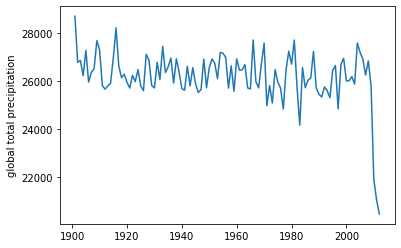

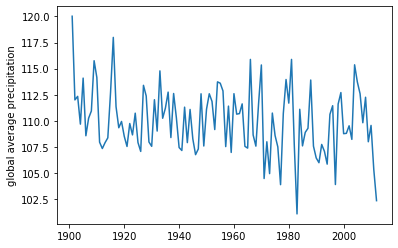

In [10]:
plt.figure()
plt.plot(pr['total'])
plt.ylabel('global total precipitation')
#plt.xlim(1901,2009)
#plt.ylim(1901,2009)
plt.figure()
plt.plot(pr['average'])
plt.ylabel('global average precipitation')

In [15]:
# There might be many missing data for the last couple of years
pr_test = pr.assign(missed = pr.isna().sum(axis=1))
pr_test
# The guess was correct! For 39 out of 112 countries, the precipitation is not reported for years 2010-2012

,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Vietnam,Wallis and Futuna (Fr.),West Bank and Gaza,"Yemen, Republic of",Zambia,Zimbabwe,romania,total,average,missed
year,,,,,,,,,,,,,,,,,,,,,
1901,19.954466,94.731670,9.086229,215.86667,65.837500,78.029625,200.60834,364.68750,38.854744,44.442593,...,147.06902,246.35832,26.168182,13.775259,83.015884,66.519730,54.282800,28684.496856,120.018815,0
1902,18.801144,91.627670,8.284088,189.99167,74.064580,78.282394,160.43333,300.17084,40.401207,41.708640,...,159.50072,243.28750,39.097725,13.614161,86.236290,51.544983,48.508987,26768.660697,112.002764,0
1903,23.728622,79.166000,6.730287,255.64168,55.468750,80.566010,141.35000,250.56250,42.776570,39.445370,...,147.91920,252.41667,28.510605,13.601555,74.615135,43.663100,42.776012,26849.443974,112.340770,0
1904,23.429220,77.868670,8.947877,267.93332,48.277084,73.865105,130.29166,192.07500,44.372555,47.054320,...,165.86374,253.12918,48.288635,13.441969,83.080700,55.066765,39.530773,26213.091626,109.678208,0
1905,21.574781,67.165665,8.052203,156.85834,73.325000,73.360430,174.64166,344.16250,45.000557,38.330246,...,154.54550,239.68750,45.146970,13.776987,74.225190,41.731678,44.678930,27267.556668,114.090195,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,19.671432,73.312000,8.657320,244.19168,72.039580,82.951546,129.28334,183.71250,41.913933,36.009260,...,172.22360,232.57500,23.775757,13.609241,83.759995,54.911500,49.906906,26829.135942,112.255799,0
2009,29.109913,105.571000,8.264082,256.13333,62.081250,84.405910,135.50000,169.30833,43.880096,44.933952,...,144.67026,226.22083,26.821970,13.478108,83.955590,50.175500,48.722023,25809.726637,107.990488,0
2010,26.058004,109.116320,8.614675,NaN,NaN,84.175186,NaN,NaN,48.375860,58.004170,...,142.03558,196.81667,24.694445,12.647741,93.453860,60.400684,67.033330,21910.924512,109.554623,39


In [16]:
# Therefore, it is better to exclude those years
pr = pr.drop([2010,2011,2012])
pr

,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Venezuela,Vietnam,Wallis and Futuna (Fr.),West Bank and Gaza,"Yemen, Republic of",Zambia,Zimbabwe,romania,total,average
year,,,,,,,,,,,,,,,,,,,,,
1901,19.954466,94.731670,9.086229,215.86667,65.837500,78.029625,200.60834,364.68750,38.854744,44.442593,...,156.648450,147.06902,246.35832,26.168182,13.775259,83.015884,66.519730,54.282800,28684.496856,120.018815
1902,18.801144,91.627670,8.284088,189.99167,74.064580,78.282394,160.43333,300.17084,40.401207,41.708640,...,155.516330,159.50072,243.28750,39.097725,13.614161,86.236290,51.544983,48.508987,26768.660697,112.002764
1903,23.728622,79.166000,6.730287,255.64168,55.468750,80.566010,141.35000,250.56250,42.776570,39.445370,...,159.411580,147.91920,252.41667,28.510605,13.601555,74.615135,43.663100,42.776012,26849.443974,112.340770
1904,23.429220,77.868670,8.947877,267.93332,48.277084,73.865105,130.29166,192.07500,44.372555,47.054320,...,159.998000,165.86374,253.12918,48.288635,13.441969,83.080700,55.066765,39.530773,26213.091626,109.678208
1905,21.574781,67.165665,8.052203,156.85834,73.325000,73.360430,174.64166,344.16250,45.000557,38.330246,...,158.464020,154.54550,239.68750,45.146970,13.776987,74.225190,41.731678,44.678930,27267.556668,114.090195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,26.901306,75.910995,5.982161,292.70830,54.829170,79.527090,145.90834,212.38333,43.515293,43.380867,...,173.108440,148.31982,232.82083,28.923487,13.338125,75.903440,57.840565,60.272560,27179.723737,113.722693
2006,23.833824,77.043660,7.570656,309.30000,58.597920,84.299500,134.61667,183.70000,44.706170,37.184875,...,173.208080,147.34799,274.64166,27.696213,13.589594,83.298930,52.058483,50.811130,26908.805871,112.589146
2007,24.966476,81.791670,7.566356,297.68332,54.479168,82.702080,115.46666,144.25000,46.120567,43.115740,...,172.903400,151.18285,236.22917,25.926514,13.708895,85.947470,55.037800,53.412620,26245.159670,109.812384


Text(0, 0.5, 'global average precipitation')

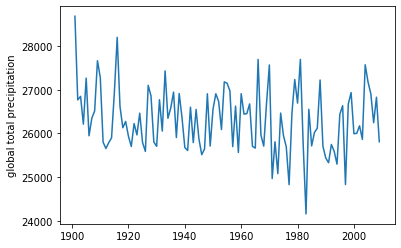

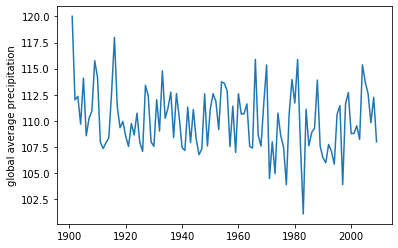

In [17]:
plt.figure()
plt.plot(pr['total'])
plt.ylabel('global total precipitation')
#plt.xlim(1901,2009)
#plt.ylim(1901,2009)
plt.figure()
plt.plot(pr['average'])
plt.ylabel('global average precipitation')